In [45]:
# Import libaries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [46]:
#Import dataset
df = pd.read_csv(r"C:\Users\jxion\OneDrive\CVTC4SEM\4-ML\Module9\cars(in).csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
# Convert non-numeric data using one-hot encoding
df = pd.get_dummies(df, columns=['carbody'])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,3,alfa-romero giulia,gas,std,two,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,True,False,False,False,False
1,2,3,alfa-romero stelvio,gas,std,two,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,True,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,gas,std,two,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,False,False,True,False,False
3,4,2,audi 100 ls,gas,std,four,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,False,False,False,True,False
4,5,2,audi 100ls,gas,std,four,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,False,False,False,True,False


In [48]:
# Remove non-numeric columns
columns_to_remove = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_ID']
df.drop(columns=columns_to_remove, inplace=True)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,True,False


In [49]:
# Assign price as the dependent variable
X = df.drop('price', axis=1)  #Features
y = df['price']               #Target
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,True,False


In [50]:
# Split data into test/train sets (70/30) & shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,True,False


In [51]:
# Assign the Linear Regression model & link X and Y variables
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Evaluate the model using Mean Absolute Error (MAE) for train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

Train MAE: 1824.472242076793
Test MAE: 2979.6906962141393


In [53]:
#Data point to predict 
car = [
    3, #symboling
    88.6, #wheelbase
    168.8, #carlength
    64.1, #carwidth
    48.8, #carheight
    2548, #curbweight
    130, #enginesize
    3.47, #boreratio
    2.68, #stroke
    9, #compressionratio
    111, #horsepower
    5000, #peakrpm
    21, #citympg
    27, #highwaympg
    1, #carbody_convertible
    0, #carbody_hardtop
    0, #carbody_hatchback
    0, #carbody_sedan
    0, #carbody_wagon  
]

# Make prediction
car= model.predict([car])
car

C:\Python\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15214.20223481])

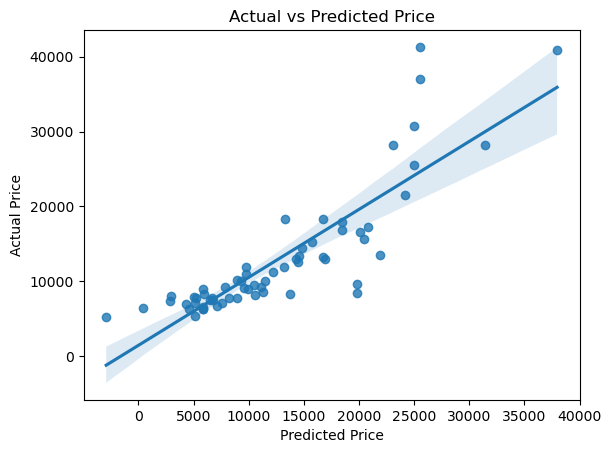

In [54]:
# Graph the Actual vs Predicted Price
pred = model.predict(X_test)

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()